In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

# Principal Components Analysis
Within this notebook, we're going to go over Principal Components Analysis (PCA) and when to use it. 

Typically, when we have a lot of different features (i.e. 50+ features), not all of them will be predictive. Because of this, it's generally quite difficult to visualize what the different clusters should be since visualizing something in 50+ dimensions is impossible. When given datasets like this, the best thing to do is to use PCA in order to reduce the amount of dimensions that you have and then from there, use these principal components to cluster and visualize them. 

With that in mind, let's get started!

In [2]:
# Load in the dataset.
data = pd.read_csv("./data/breast_cancer.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# How many different columns/rows do we have?

In [5]:
data.shape

(569, 33)

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# Drop the columns that you feel are unneccessary.

In [8]:
# debated whether to encode diagnosis, but decided to drop this column in the end

In [9]:
data = data.drop(['id', 'diagnosis'], axis=1)

In [10]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
data.isnull().sum()

radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

In [12]:
data = data.drop(['Unnamed: 32'], axis=1)

In [13]:
data.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Perform PCA.
Typically when performing PCA, we want to reduce the amount of dimensions down to the top 3 or 4. However, before doing this we need to standardize our numerical data such that the mean is roughly at around 0 and we have a standard deviation of roughly around 1. Afterwards, we perform PCA and get the explained variance ratio to see how well our principal components performed. 

If, for example, the first two principal components were able to capture a lot of the variance within the dataset, we could then use clustering methods in order to visualize and come up with different clusters.

In [14]:
# Standardize/Normalize the dataset.


X = data

# z scores for all values
scaler = StandardScaler()
standardized_X = scaler.fit_transform(X)

In [15]:
# Use the describe() function to ensure that your columns roughly have a mean of 0 and a standard deviation of 1.

In [16]:
standardized_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [17]:
# need to work on this as fit_transform produces an np array and .describe requires a df
# think i did this in a bit of a labourish way - ask about faster/more programtic way to do it!

In [30]:
standardized_X_dataframe = pd.DataFrame(standardized_X, columns=["radius_mean", 
"texture_mean",
"perimeter_mean",            
"area_mean",                  
"smoothness_mean",            
"compactness_mean",           
"concavity_mean",             
"concave points_mean",        
"symmetry_mean",              
"fractal_dimension_mean",     
"radius_se",                  
"texture_se",                 
"perimeter_se",               
"area_se",                    
"smoothness_se",              
"compactness_se",             
"concavity_se",               
"concave points_se",          
"symmetry_se",                
"fractal_dimension_se",       
"radius_worst",               
"texture_worst",              
"perimeter_worst",            
"area_worst",                 
"smoothness_worst",           
"compactness_worst",         
"concavity_worst",            
"concave points_worst",       
"symmetry_worst",             
"fractal_dimension_worst"])

In [31]:
standardized_X_dataframe.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [18]:
# Perform PCA with 4 principal components using the fit_transform() command.
# Save the output of fit_transform() into a variable called pca_components.

In [19]:
pca = sklearnPCA(n_components=4)
pca_components = pca.fit_transform(standardized_X)

In [20]:
pca_components[0]

array([ 9.19283683,  1.94858314, -1.12316433,  3.63372738])

In [21]:
# What is the explained variance ratio for each of the principal components?
# Do you think that the first two principal components do a good job in explaining the variance of the dataset?

In [22]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135]


In [23]:
# i think that the first two principal components account for most of the explained variance 
# this is just one row, but perhaps two pca would be sufficient

In [24]:
# For the variable pca_components, put this into a dataframe such that there are 4 columns called PC1, PC2, PC3 and PC4.
pca_dataframe = pd.DataFrame(pca_components, columns=["PC1", "PC2", "PC3", "PC4"])

In [25]:
pca_dataframe.head()

,PC1,PC2,PC3,PC4
0,9.192837,1.948583,-1.123164,3.633727
1,2.387802,-3.768172,-0.529294,1.118267
2,5.733896,-1.075174,-0.551748,0.912082
3,7.122953,10.275589,-3.232790,0.152548
4,3.935302,-1.948072,1.389766,2.940642


In [26]:
pca_dataframe.describe()

,PC1,PC2,PC3,PC4
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,1.498508e-16,4.370650e-17,-2.497514e-17,-1.248757e-17
std,3.647601e+00,2.387755e+00,1.680152e+00,1.408591e+00
min,-5.565736e+00,-7.775853e+00,-4.880362e+00,-5.133989e+00
25%,-2.757430e+00,-1.499825e+00,-1.017070e+00,-7.863140e-01
50%,-1.173831e+00,-1.959559e-01,-1.557014e-01,1.155665e-01
75%,2.508766e+00,1.228297e+00,8.568269e-01,9.694157e-01
max,1.631923e+01,1.257319e+01,1.011242e+01,5.194277e+00


In [27]:
# Plot a scatter plot of the first two principal using the dataframe that you created above.

Text(0, 0.5, 'principal component 2')

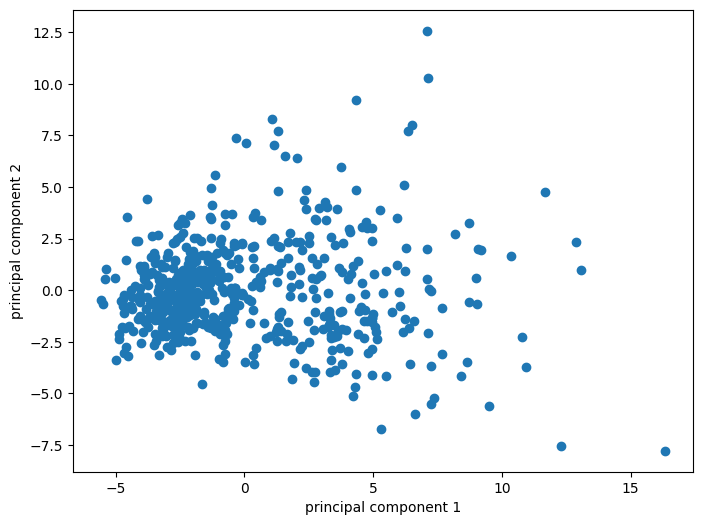

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(data = pca_dataframe, x="PC1", y="PC2")
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')


In [32]:
# Challenge: Using the first two principal components, can you use Hierarchical Clustering to get the appropriate amount of clusters?
import scipy
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt


## Step 1: Use PC1 and PC2 for hierarchical clustering.

## Step 2: Show the dendrogram.

## Step 3: Perform Hierarchical Clustering using your chosen amount of clusters.

## Step 4: Plot the hierarchical clustering results. Do they make sense?

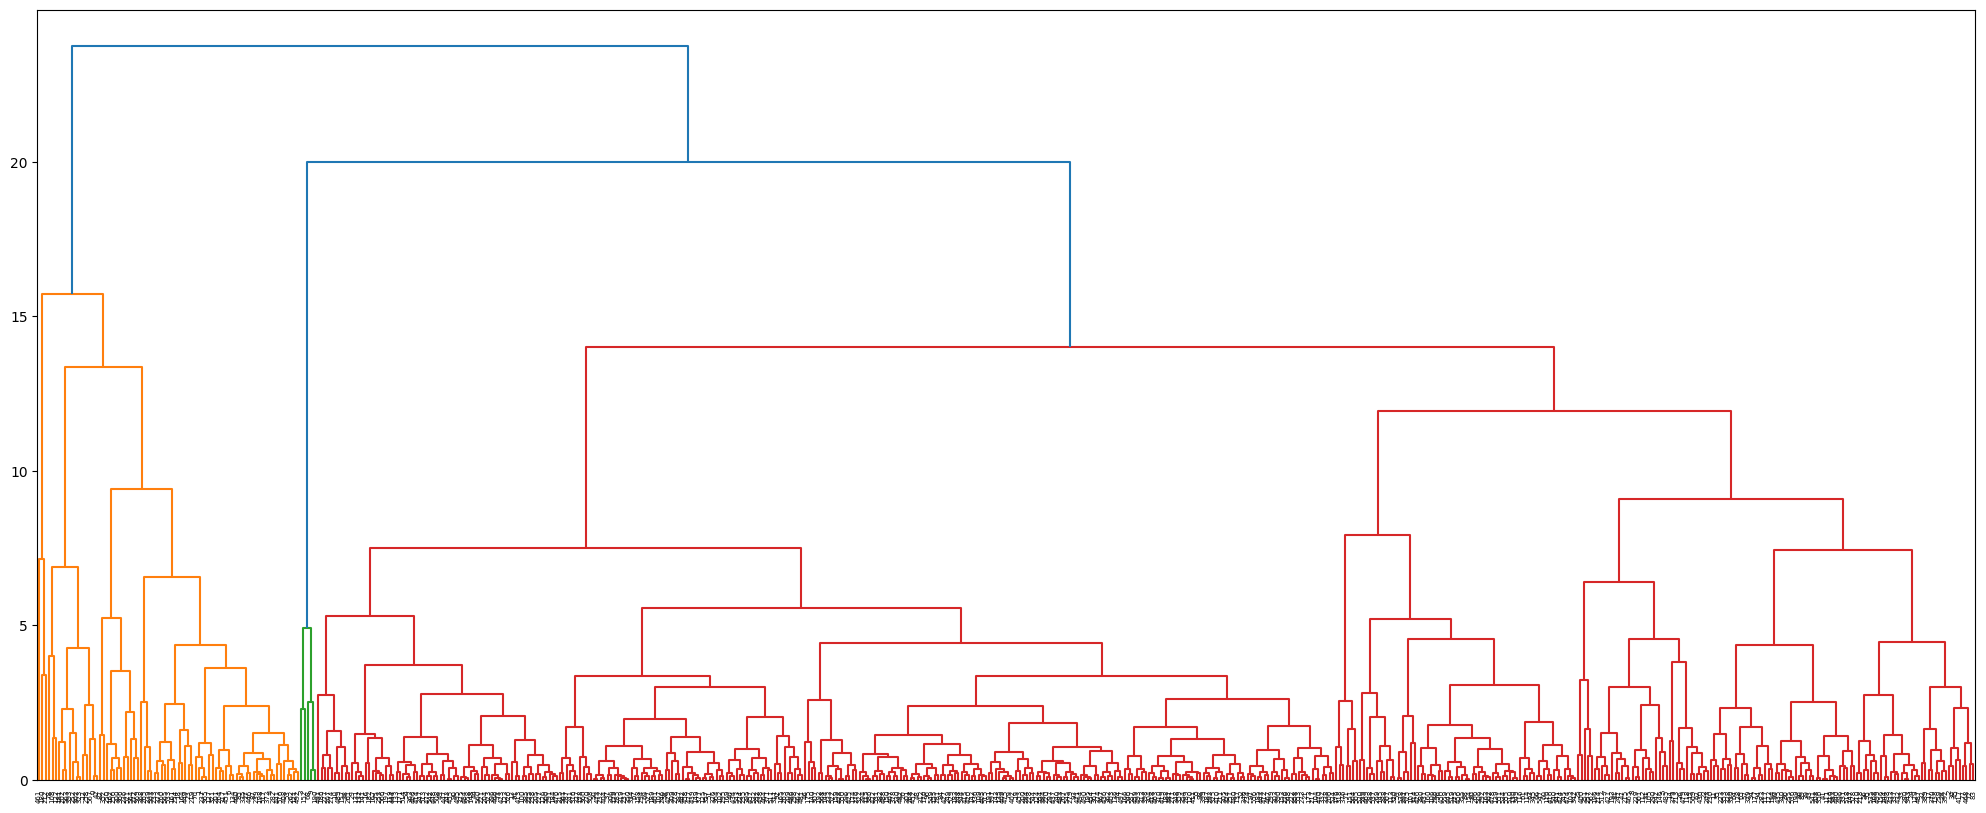

In [33]:
clusters = hierarchy.linkage(pca_dataframe[["PC1", "PC2"]], method="complete")
fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(clusters)


In [34]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_clustering = AgglomerativeClustering(
    n_clusters=3, 
)

In [35]:
hierarchical_clusters = hierarchical_clustering.fit_predict(pca_dataframe)

In [36]:
pca_dataframe['predicted_hier_cluster'] = hierarchical_clusters.tolist()

In [37]:
pca_dataframe.head()

,PC1,PC2,PC3,PC4,predicted_hier_cluster
0,9.192837,1.948583,-1.123164,3.633727,1
1,2.387802,-3.768172,-0.529294,1.118267,1
2,5.733896,-1.075174,-0.551748,0.912082,1
3,7.122953,10.275589,-3.232790,0.152548,2
4,3.935302,-1.948072,1.389766,2.940642,1


Text(0, 0.5, 'principal component 2')

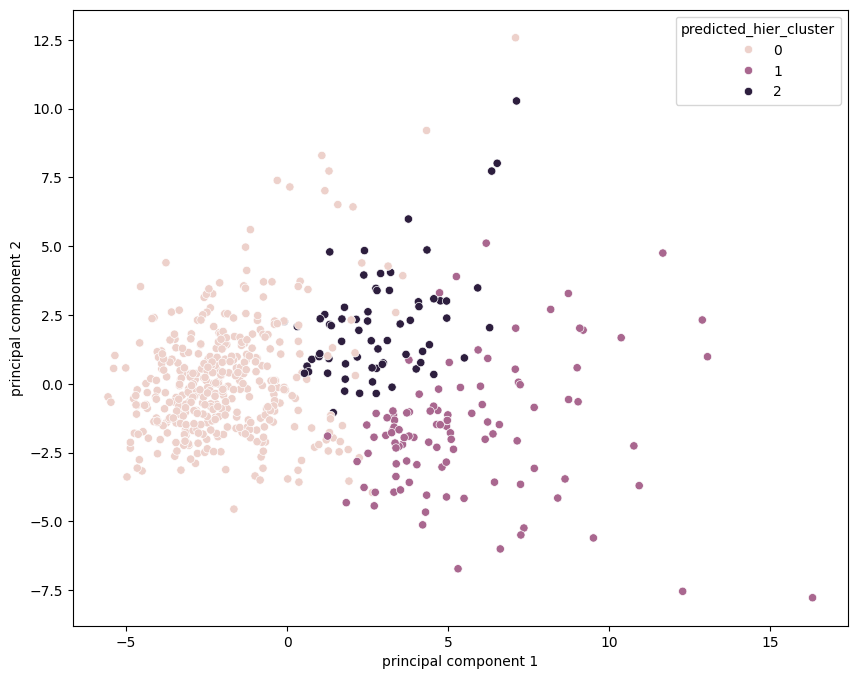

In [38]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_dataframe, x="PC1", y="PC2", hue="predicted_hier_cluster")
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')